In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from glob import glob
import pickle
from os import chdir 
import seaborn as sns
%matplotlib inline

In [2]:
# glob('results/experiments_results/*')
models = ['catboost', 'ours', 'sklearn','xgboost']

In [3]:
catboost = pd.concat([pd.read_csv(path) for path in glob(f"results_sigma10/experiments_results/catboost/*.csv")])
ours = pd.concat([pd.read_csv(path) for path in glob(f"results_sigma10/experiments_results/ours/*.csv")])
sklearn = pd.concat([pd.read_csv(path) for path in glob(f"results_sigma10/experiments_results/sklearn/*.csv")])
xgboost = pd.concat([pd.read_csv(path) for path in glob(f"results_sigma10/experiments_results/xgboost/*.csv")])

In [4]:
df = pd.concat([catboost, ours, sklearn, xgboost])
df = df[df.columns[1:]]
df.loc[:,['gain','permutation_train','permutation_test','shap_test']] = 1 - df.loc[:,['gain','permutation_train','permutation_test','shap_test']]
df = df.groupby(['model','categories','a']).mean().reset_index().drop(columns = ['exp'])
df.head(2)

,model,categories,a,gain,permutation_train,permutation_test,shap_train,shap_test
0,catboost_mean_imputing,2,0,0.774349,0.865745,1.016049,0.147381,0.855724
1,catboost_mean_imputing,2,1,0.728751,0.826600,1.011873,0.183853,0.818746


In [5]:
def plot_as_function_of_k(df,fi, a):
    temp_df = df[df['a'] == a]
    if fi in ['shap_train','shap_test']:
        temp_df = temp_df[~temp_df['model'].isin(['ours_CartVanilla','ours_Kfold'])]
    plt.rcParams['figure.figsize'] = [20, 10]
    ax = sns.lineplot(x = 'categories', y = fi, hue = 'model', data = temp_df)
    ax.set_xlabel("Number of categories")
    ax.set_ylabel("Feature importance of the category vaector")
    ax.set_title(F"{fi} Feature importance  of the category vaector with K categories as a function of K")
    plt.legend(loc='upper right')
    plt.show()
    
    
def plot_as_function_of_a(df,fi, k):
    temp_df = df[df['categories'] == k]
    if fi in ['shap_train','shap_test']:
        temp_df = temp_df[~temp_df['model'].isin(['ours_CartVanilla','ours_Kfold'])]
    plt.rcParams['figure.figsize'] = [20, 10]
    ax = sns.lineplot(x = 'a', y = fi, hue = 'model', data = temp_df)
    ax.set_xlabel("Number of categories")
    ax.set_ylabel("Feature importance of the category vaector")
    ax.set_title(F"{fi} Feature importance  of the category vaector with {k} categories as a function of a")
    plt.legend(loc='upper right')
    plt.show()

# Experiment

$$y = a *I[X_1>0] + (10-a)* I[X_2\in {right}] + \sigma$$
$$\sigma \rightarrow N(0,10)$$
## 15 experiments

In [6]:
# a = 10
# for fi in ['gain','permutation_train','permutation_test','shap_test']:
#     plot_as_function_of_k(df,fi, a)

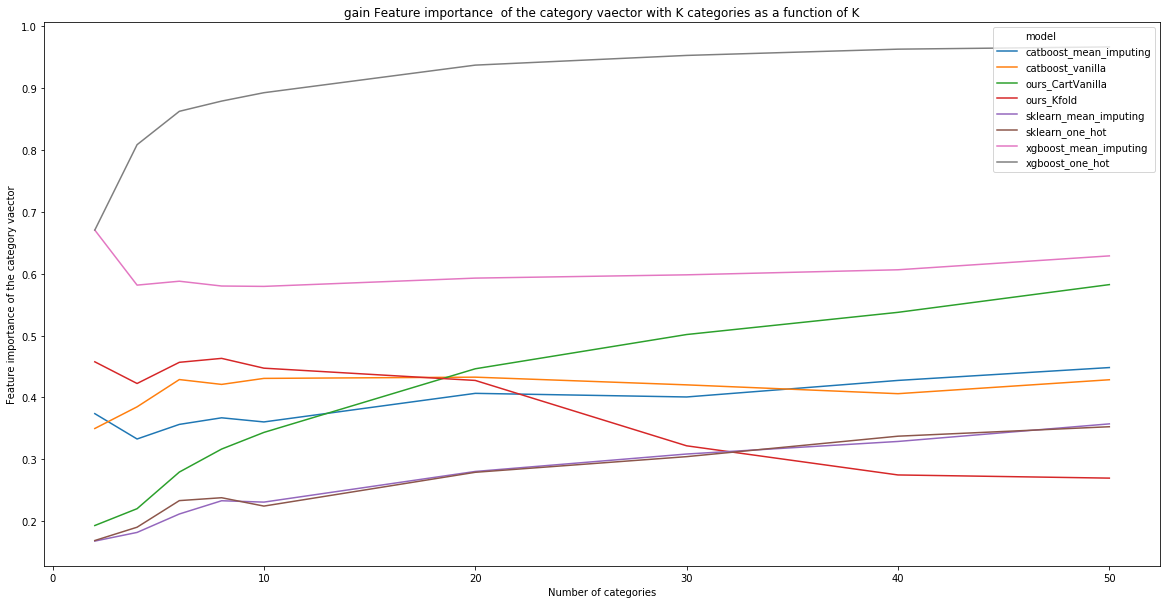

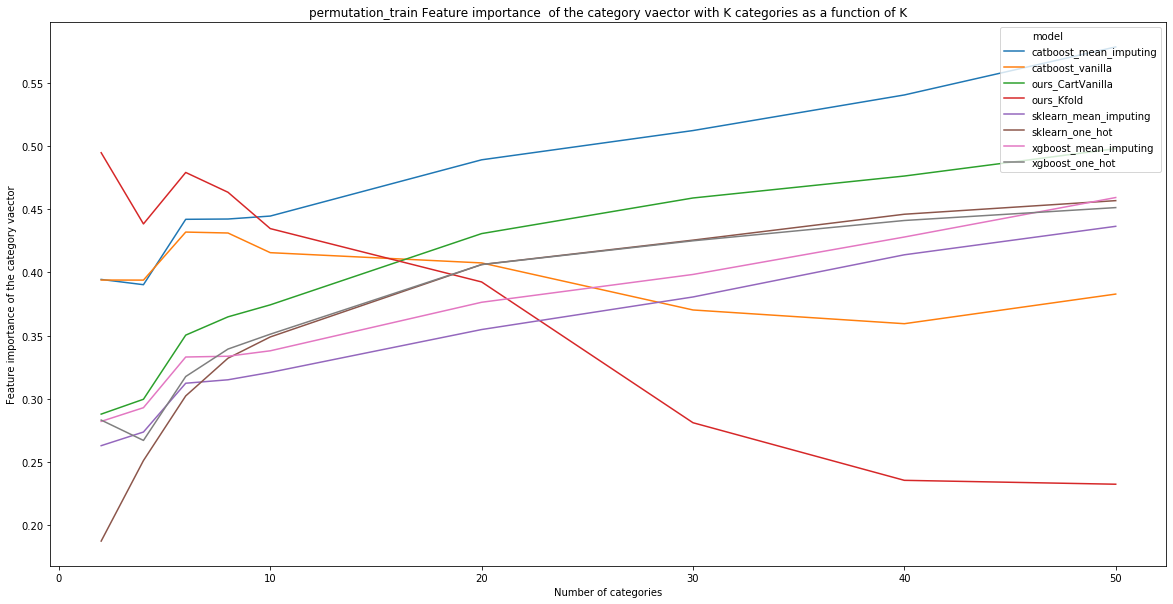

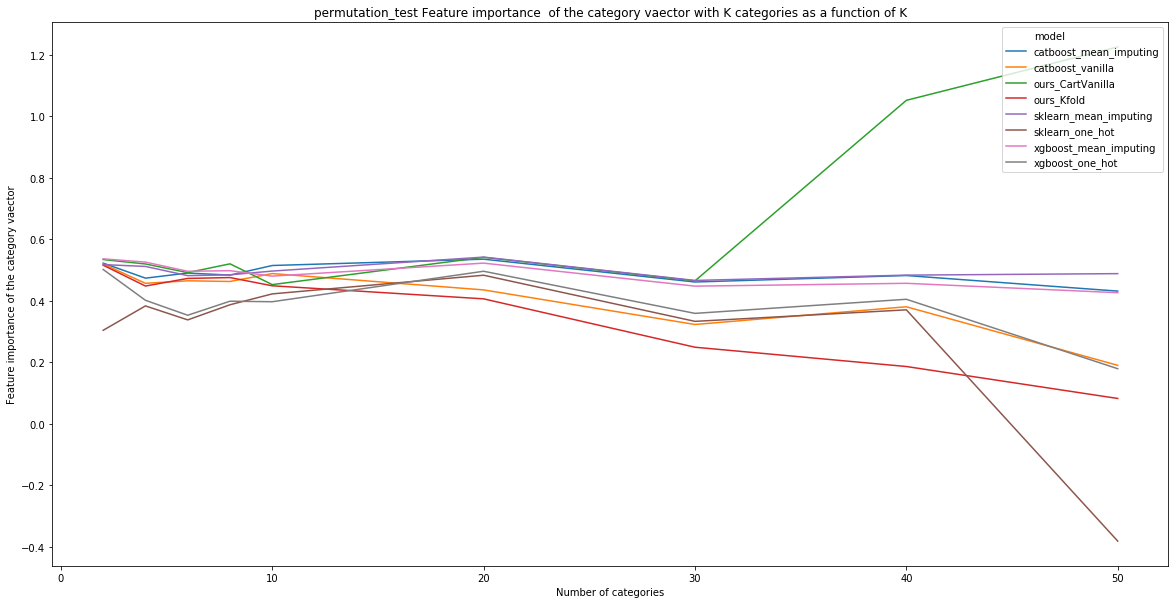

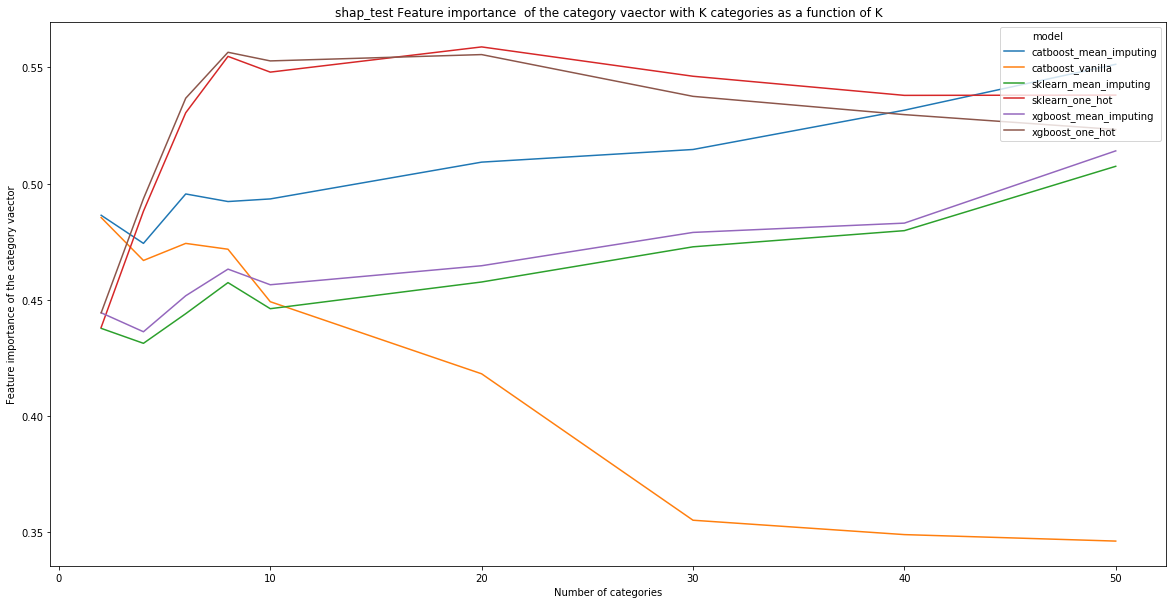

In [7]:
a = 5
for fi in ['gain','permutation_train','permutation_test','shap_test']:
    plot_as_function_of_k(df,fi, a)

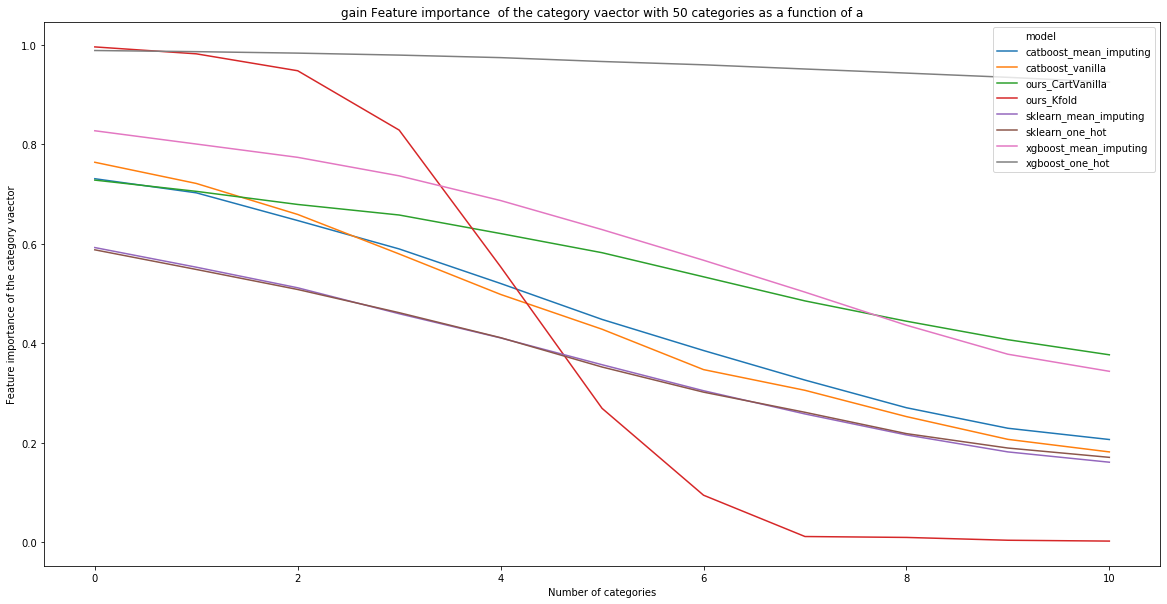

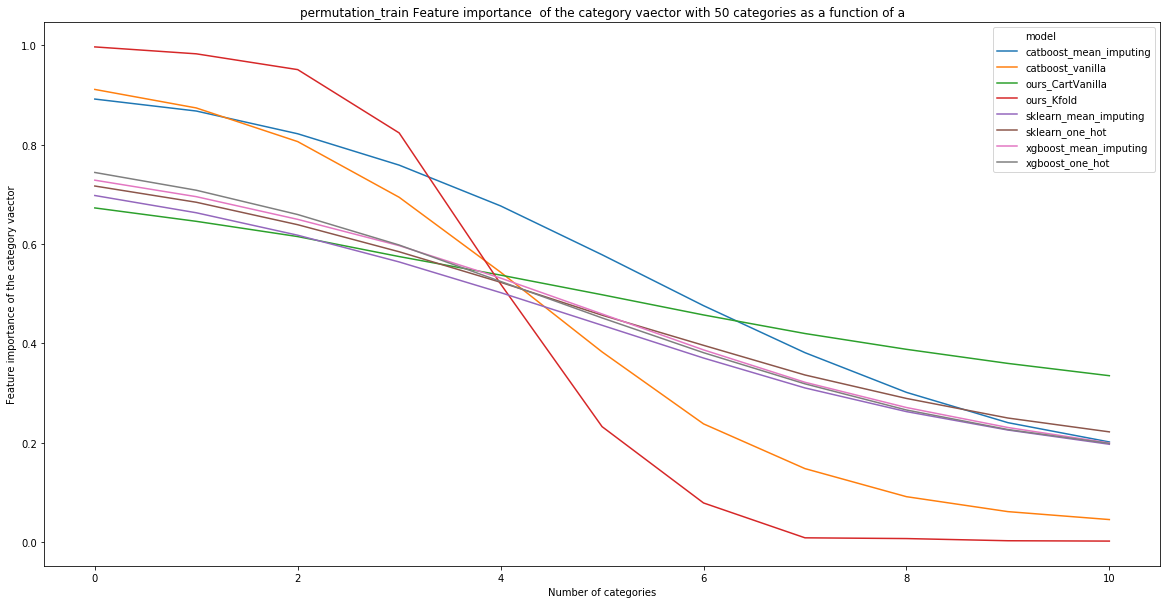

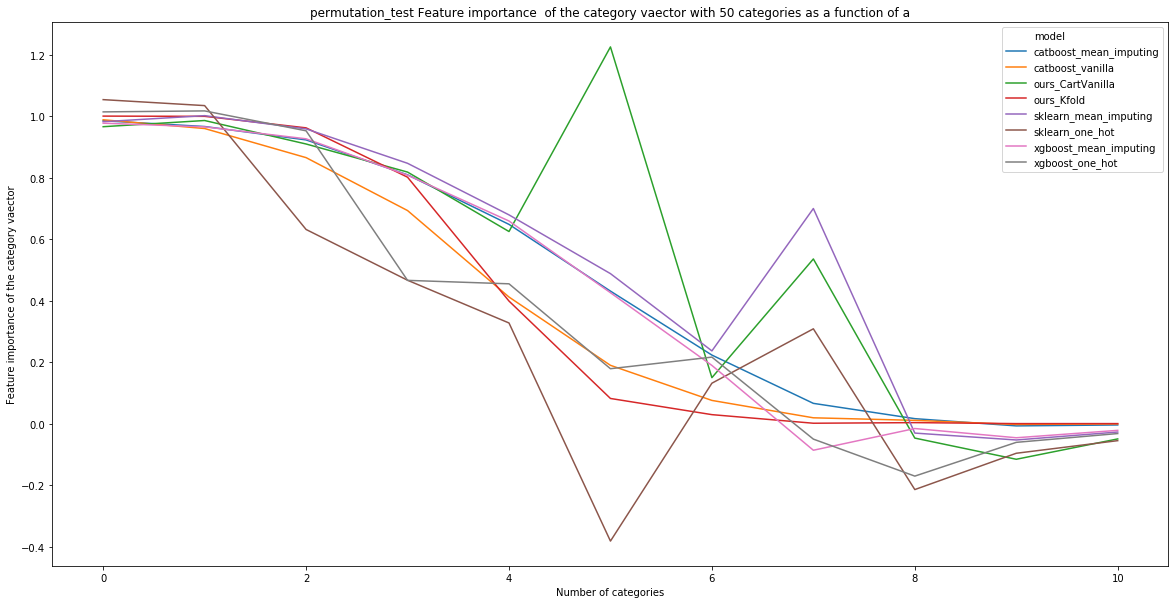

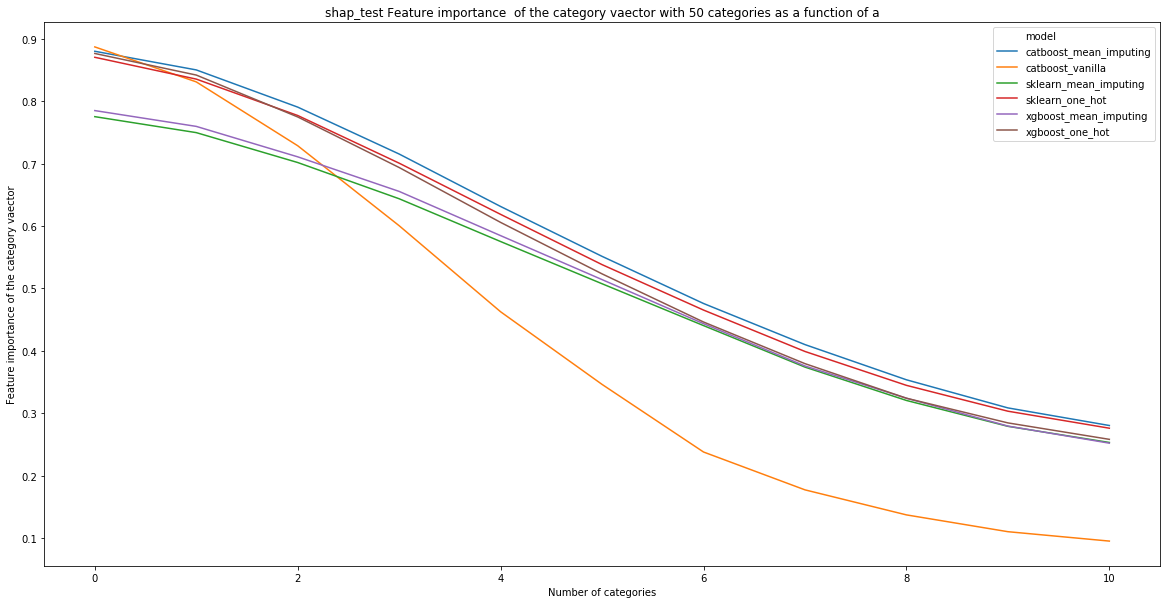

In [8]:
k = 50
for fi in ['gain','permutation_train','permutation_test','shap_test']:
    plot_as_function_of_a(df,fi, k)